Name: Amanda Baker

Andrew ID: adbaker

Collaborators: Python Standard Library, Spacy Demo by Prof. George Chen, Stack Overflow, MatPlotLib.org,
    Codereview.stackexchange.com

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [1]:
import spacy

In [2]:
import en_core_web_sm
import glob
import re
nlp = spacy.load('en_core_web_sm')

# test file - using throughout problem 1 due to memory limitations
text = open('./HW1_Dataset/Metamorphosis by Franz Kafka (483).txt', encoding="utf8").read()

# all files - not using due to memory limitations
'''all_text = ''
for filename in glob.glob('./HW1_Dataset/*.txt'):
    text = open(filename, encoding="utf8").read()
    all_text += text'''


'all_text = \'\'\nfor filename in glob.glob(\'./HW1_Dataset/*.txt\'):\n    text = open(filename, encoding="utf8").read()\n    all_text += text'

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [3]:
from collections import Counter
from operator import itemgetter

# update text to all_text when ready to run full version of code
parsed_text = nlp(text) 
word_freq = Counter()

for token in parsed_text:
    if re.match('[a-zA-Z]+$', str(token)):
        original_token_text = token.orth_
        word_freq[original_token_text] = word_freq[original_token_text] + 1
            
sorted_word_freq = sorted(word_freq.items(), reverse=True, key=itemgetter(1))
i = 1
for word, count in sorted_word_freq[:50]:
    print('{}.  {}:  {}'.format(i, word, count))
    i += 1

1.  the:  1265
2.  to:  827
3.  and:  680
4.  of:  541
5.  his:  524
6.  he:  508
7.  was:  412
8.  in:  395
9.  had:  352
10.  it:  343
11.  that:  343
12.  a:  341
13.  Gregor:  298
14.  as:  243
15.  with:  241
16.  not:  200
17.  would:  189
18.  him:  188
19.  her:  183
20.  for:  180
21.  she:  175
22.  at:  174
23.  on:  160
24.  all:  148
25.  but:  143
26.  they:  140
27.  be:  136
28.  from:  131
29.  room:  131
30.  could:  128
31.  this:  120
32.  out:  114
33.  or:  113
34.  have:  113
35.  you:  106
36.  been:  101
37.  sister:  101
38.  father:  99
39.  there:  98
40.  if:  92
41.  I:  90
42.  himself:  87
43.  door:  87
44.  He:  85
45.  mother:  85
46.  Project:  84
47.  Gutenberg:  84
48.  so:  84
49.  up:  84
50.  back:  82


(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

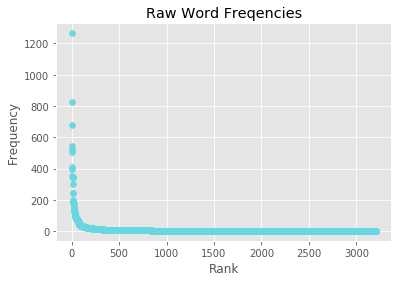

In [4]:
# Raw scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

x = range(0, len(sorted_word_freq))
y = [count for word, count in sorted_word_freq]
plt.title('Raw Word Freqencies')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.scatter(x, y, color = '#69D7E1')
plt.show()

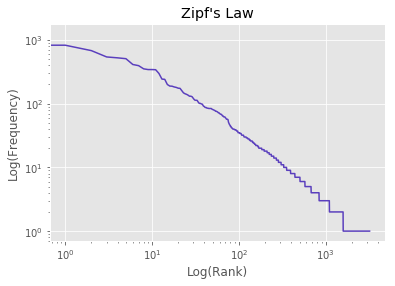

In [5]:
# Log-log plot

x = range(0, len(sorted_word_freq))
y = [count for word, count in sorted_word_freq]
plt.title('Zipf\'s Law')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.loglog(x, y, color = '#5A3FBD')
plt.show()

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

*** Based on the log-log plot above, the observations from this data set are consitent with Zipf's law, which is to say that the rule that for a decrease in one frequency rank position follows the Zipf's law. ***

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [6]:
total_words = [count for word, count in sorted_word_freq]

most_freq_4 = [count for word, count in sorted_word_freq[:4]]
print('Probability of drawing one of the 4 most frequent words: ', round((sum(most_freq_4)/sum(total_words)), 3))

most_freq_50 = [count for word, count in sorted_word_freq[:50]]
print('Probability of drawing one of the 50 most frequent words: ', round((sum(most_freq_50)/sum(total_words)), 3))

Probability of drawing one of the 4 most frequent words:  0.132
Probability of drawing one of the 50 most frequent words:  0.464


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [7]:
only_one_word = [count for word, count in sorted_word_freq if count == 1]
print('Occur only once: ', round((sum(only_one_word)/sum(total_words)), 3))

less_than_10 = [count for word, count in sorted_word_freq if count < 10]
print('Occur fewer than 10 times: ', round((sum(less_than_10)/sum(total_words)), 3))

Occur only once:  0.065
Occur fewer than 10 times:  0.245


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
from nltk.corpus import stopwords
import numpy as np
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
len(reuters_nlp)

10788

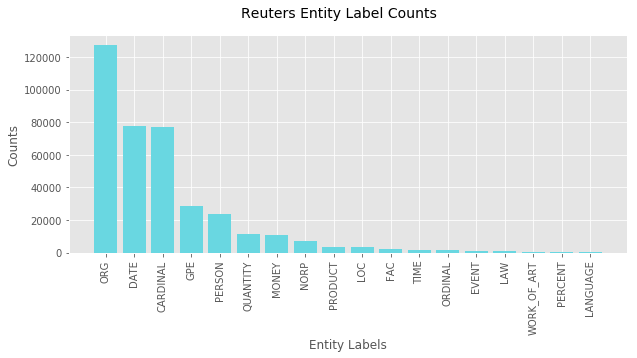

In [9]:
from operator import itemgetter
label_counter = Counter()

for doc in reuters_nlp:
    for token in doc:
        original_token_ent = token.ent_type_
        label_counter[original_token_ent] += 1

token_counts = sorted(label_counter.items(), reverse=True, key=itemgetter(1))

x = [ent for ent, count in token_counts if ent != '']
y = [count for ent, count in token_counts if ent != '']

plt.style.use('ggplot') 
plt.figure(figsize=(10,4))
plt.bar(x, y, width = .8, color = '#69D7E1')
plt.xticks(range(0, len(y)), x, rotation = 90)
plt.suptitle('Reuters Entity Label Counts', fontsize = 14)
plt.xlabel('Entity Labels', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [10]:
# I interpretted this question as listing out the top 10 entities that ocurred in the most documents,
# regardless of the number of times the entity occurred

org_word_counter = Counter()
gpe_word_counter = Counter()
            
for doc in reuters_nlp:
    track_doc_entity = []
    for entity in doc.ents:
        if (entity.label_ is 'ORG') and (entity.text not in track_doc_entity):
            org_word_counter[entity.text] += 1
            track_doc_entity.append(entity.text)
            
for doc in reuters_nlp:
    track_doc_entity = []
    for entity in doc.ents:
        if (entity.label_ is 'GPE') and (entity.text not in track_doc_entity):
            gpe_word_counter[entity.text] += 1
            track_doc_entity.append(entity.text)
            
sorted_org_counts = sorted(org_word_counter.items(), reverse=True, key=itemgetter(1))
sorted_gpe_counts = sorted(gpe_word_counter.items(), reverse=True, key=itemgetter(1))

i = 1
print('Top 10 Most Frequently Occurring ORG Entities\n')
for word, count in sorted_org_counts[:10]:
    print('{}.  {}:  {}'.format(i, word, count))
    i += 1
    
i = 1
print('\nTop 10 Most Frequently Occurring GPE Entities\n')
for word, count in sorted_gpe_counts[:10]:
    print('{}.  {}:  {}'.format(i, word, count))
    i += 1

Top 10 Most Frequently Occurring ORG Entities

1.  Avg:  583
2.  Reuters:  445
3.  the Securities and Exchange Commission:  244
4.  EC:  240
5.  USDA:  226
6.  NET:  203
7.  Treasury:  157
8.  FED:  141
9.  Congress:  138
10.  Fed:  135

Top 10 Most Frequently Occurring GPE Entities

1.  U.S.:  1666
2.  Shr:  690
3.  Japan:  536
4.  the United States:  345
5.  U.K.:  309
6.  Canada:  243
7.  New York:  239
8.  West Germany:  232
9.  Washington:  230
10.  JAPAN:  221


(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [11]:
import math

np.set_printoptions(precision=5, suppress=True)
co_occ_table = Counter()

opec_doc_lst = []
for doc in reuters_nlp:
    for token in doc:
        if token.orth_ == 'OPEC':
            opec_doc_lst.append(doc)
            
# creating the co-occurrence table
for doc in opec_doc_lst:
    track_doc_tokens = []
    for token in doc:
        if (token.ent_type_ == 'GPE') and (token.lemma_ != 'opec') and (token.orth_ not in track_doc_tokens):
            text = token.orth_
            co_occ_table[text] += 1
            track_doc_tokens.append(text)

# calculating P(A,B) - the probability of the gpe entity and 'OPEC' occurring together among all documents with 'OPEC'
joint_prob_table = [[x, round(count / sum(co_occ_table.values()), 6)] for x, count in co_occ_table.items()]

# P('OPEC')
p_opec = len(opec_doc_lst) / len(reuters_nlp)

# P(gpe)
indep_prob_table = [[x, round(count / len(reuters_nlp), 6)] for x, count in gpe_word_counter.items()]

# P('OPEC')P(gpe)
p_opec_by_p_gpe = [[x, round(count * p_opec, 6)] for x, count in indep_prob_table]


# P('OPEC', gpe)/P('OPEC')P(gpe)
for lst in joint_prob_table:
    i = 0
    for lst2 in p_opec_by_p_gpe:
        if lst[0] in lst2:
            lst[1] = math.log(lst[1] / lst2[1])

sorted_joint_prob = sorted(joint_prob_table, key = lambda x: -x[1])

i = 1
print('\nTop 50 GPE Entities with Highest PMI in Regard to ''OPEC'':\n')
for word, count in sorted_joint_prob[:50]:
    print('{}.  {}:  {}'.format(i, word, round(count,2)))
    i += 1


Top 50 GPE Entities with Highest PMI in Regard to OPEC:

1.  United:  8.89
2.  Emirates:  7.91
3.  Visnews:  7.19
4.  CERA:  7.19
5.  I.E.:  6.72
6.  Brent:  6.24
7.  Vienna:  6.11
8.  Libya:  5.93
9.  Dubai:  5.92
10.  Nigeria:  5.83
11.  Tripoli:  5.81
12.  Nazir:  5.81
13.  Qatar:  5.72
14.  Yanbu:  5.69
15.  Lagos:  5.64
16.  QUOTA:  5.46
17.  Kuwait:  5.33
18.  Balao:  5.28
19.  Lichtblau:  5.11
20.  Minas:  5.11
21.  Duri:  5.11
22.  BAHRAIN:  5.11
23.  Doha:  5.11
24.  North:  5.11
25.  Norway:  5.11
26.  Riyadh:  5.07
27.  Jamaica:  5.05
28.  Iceland:  4.96
29.  UAE:  4.94
30.  Ecuador:  4.84
31.  Egypt:  4.76
32.  KUWAIT:  4.73
33.  INA:  4.71
34.  Iraq:  4.64
35.  Jakarta:  4.58
36.  ECUADOR:  4.56
37.  IRAQ:  4.55
38.  Algeria:  4.52
39.  NORWAY:  4.48
40.  Geneva:  4.43
41.  Sulphur:  4.42
42.  L.F.:  4.42
43.  Bethesda:  4.42
44.  Easter:  4.42
45.  PGRT:  4.42
46.  Aguarico:  4.42
47.  Ecaudor:  4.42
48.  Ju'aymah:  4.42
49.  DISCUSSION:  4.42
50.  Caracas:  4.37


Your text answer (for this question, your answer is *not* code): *** I was surprised to see values like Iceland on the list, since I wouldn't naturally think about iceland when I think about OPEC, or expect those two words to occur together frequently. However, based on the relatively high PMI score, which indicates that the probability of co-occurrence is lower than the probability of each word's independent occurrence, it seems that Iceland often occurs in the same documents as OPEC. Issues with PMI could be because PMI doesn't take into account the frequency of each word within a document, and so some words that should have a higher PMI aren't accounted for because they're only counted once (I have the GPE entities 'Saudi' and 'Arabia' in mind here). This would mean an underrepresentation of many words on this list. ***


### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://goo.gl/forms/tGmCD8L9uI8zNbRG3

In [12]:
# Submitted